<a href="https://colab.research.google.com/github/Shrestha99/K-means-clustering/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

## Prediction using unsupervised ML

### Shrestha De

#### Importing necessary libraries

In [ ]:
from sklearn.cluster import KMeans  
import sklearn.cluster as cluster
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#### Importing the iris dataset

In [ ]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Putting only the neessary columns as covariates in 'x'

In [ ]:
x = data.iloc[:, [1,2,3,4]].values

#### Model building

In [ ]:
K=range(1, 12)
wss = []  #Initializing the list for the values of WSS  
  
#Using for loop for iterations  
for k in K:  
    kmeans = cluster.KMeans(n_clusters=k, init='k-means++')  
    kmeans.fit(x)  
    wss_iter= kmeans.inertia_   #Sum of squared distances of samples to their closest cluster centre
    wss.append(wss_iter)
    

#### Optimizing number of clusers from the elbow curve

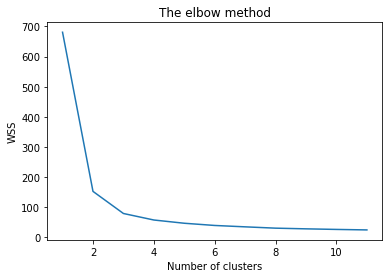

In [ ]:
plt.plot(K, wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

#### Applying kmeans to the dataset

In [ ]:
# We store the number of clusters along with their WSS score in a dataframe
kmean = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans= kmeans.fit_predict(x)

#### The clusters

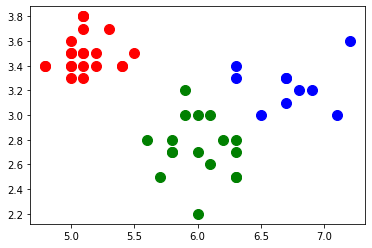

In [ ]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='blue', label='Cluster 3')
